In [3]:
using LinearAlgebra
using Arpack
using Plots

In [35]:
function inviter(A, s, numiter)
    n = size(A, 1)
    x = normalize(rand(n), Inf)
    B = A - s * I
    Bfact = lu(B)
    γ = zeros(numiter)
    for k in 1:numiter
        y = Bfact.U \ (Bfact.L \ x)
        m = argmax(abs.(y))
        γ[k] = x[m] / y[m] + s
        x = y / y[m]
    end
    return γ, x
end

inviter (generic function with 1 method)

In [40]:
λ = [1, -.75, .6, -.4, 0]
A = UpperTriangular(ones(5,5)) + diagm(λ .- 1);

In [41]:
s = .7
iter = 30
γ, v = inviter(A, s, iter);

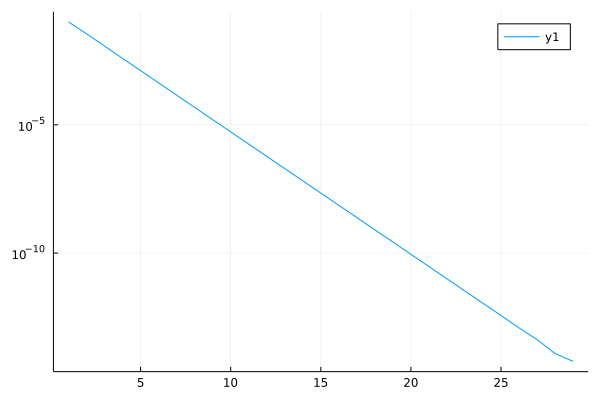

In [48]:
γinv = γ[end]
err = abs.(γinv .- γ);
plot(1:iter-1, err[1:end-1], yaxis=:log)

In [73]:
# This algorithm finds the eigenvalue of A that is closest to s
γ[end] ≈ λ[3]

true